In [1]:
!pip install reportlab
!pip install pdf2image
!pip install pillow
!apt-get install -y poppler-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.0 MB/s eta 0:00:0000:01
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 132 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (2,293 kB/s)     
Selecting previously unselected package poppler-utils.
(Reading database ... 127365 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from pdf2image import convert_from_path
from wand.image import Image as WImage
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, HRFlowable, Table, TableStyle, Image
import random
import shutil
from datetime import datetime
import requests
import os

# Read data from csv

In [3]:
df = pd.read_csv("/kaggle/input/receipt-data/data.csv")
df.head()

<ipython-input-3-492a4e4da635>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/receipt-data/data.csv")


NTN                    NAME              S.T.Reg. No  \
0  3650292853471  MUHAMMAD BEHZAD ARSHAD  10000-10046-8761-413-23   
1  3740503017362       MISS FARHAT MALIK  10000-10046-8761-413-23   
2  3730122452353      MIRZA SHAHBAZ BAIG  10000-10046-8761-413-23   
3  3650292844921   MUHAMMAD BILAL ARSHAD  10000-10046-8761-413-23   
4  3650170698023        BABAR HABIB NOON    10000-77-18730-413-23   

                Address  Customer_Receipt_NO Customer_NTN  \
0  040-Tando Allah Main              1122916    0000092-2   
1  118. Gulshan-E-Iqbal              1181647    0000094-9   
2  131-West Wood Colony              1196218    0000098-1   
3  145-C Sattelite Town               908244    0000131-7   
4  14-Km Ferozpure Road               902983    0000146-5   

            Customer_NAME Customer_S.T.Reg. No Customer_Phone Number  \
0             ABDUL MANAN    32-77-8761-413-23             685874327   
1         MUNAWAR SULTANA    33-77-8761-413-23             744080328   
2           EHSAN SHAFQAT    34-77-8761-413-23             912263285   
3  MUHAMMAD ANEES QURESHI    35-77-8761-413-23            3003232696   
4          MUHAMMAD AJMAL    36-77-8761-413-23            3005352693   

       Customer_Address  ... Amount Including Taxes_Product_2  \
0  145-C Sattelite Town  ...                          5097.60   
1  Wala Colony House 34  ...                          1699.20   
2  Apt-906 Rehman Tower  ...                           817.74   
3  37-C P. O Box. 20021  ...                          1438.42   
4  205 Muhammadia Plaza  ...                          4874.58   

  Amount Excluding Taxes_Product_3 Sales Tax @ 18%_Product_3  \
0                           2046.0                    368.28   
1                           2272.0                    408.96   
2                           3404.0                    612.72   
3                           3186.0                    573.48   
4                           4559.0                    820.62   

  Amount Including Taxes_Product_3 Amount Excluding Taxes_Product_4  \
0                          2414.28                           4929.0   
1                          2680.96                           1870.0   
2                          4016.72                           2304.0   
3                          3759.48                           2904.0   
4                          5379.62                           5734.0   

  Sales Tax @ 18%_Product_4  Amount Including Taxes_Product_4  \
0                    887.22                           5816.22   
1                    336.60                           2206.60   
2                    414.72                           2718.72   
3                    522.72                           3426.72   
4                   1032.12                           6766.12   

   Total Amount Excluding Taxes  Total Sales Tax @ 18%  \
0                       13195.0                2375.10   
1                       10826.0                1948.68   
2                       10958.0                1972.44   
3                        7377.0                1327.86   
4                       20586.0                3705.48   

   Total Amount Including Taxes  
0                      15570.10  
1                      12774.68  
2                      12930.44  
3                       8704.86  
4                      24291.48  

[5 rows x 47 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NTN                               20000 non-null  object 
 1   NAME                              19996 non-null  object 
 2   S.T.Reg. No                       20000 non-null  object 
 3   Address                           20000 non-null  object 
 4   Customer_Receipt_NO               20000 non-null  int64  
 5   Customer_NTN                      20000 non-null  object 
 6   Customer_NAME                     19999 non-null  object 
 7   Customer_S.T.Reg. No              20000 non-null  object 
 8   Customer_Phone Number             20000 non-null  object 
 9   Customer_Address                  20000 non-null  object 
 10  Business Name                     20000 non-null  object 
 11  Product 1                         19985 non-null  object 
 12  Prod

In [5]:
df.isna().sum()

NTN                                  0
NAME                                 4
S.T.Reg. No                          0
Address                              0
Customer_Receipt_NO                  0
Customer_NTN                         0
Customer_NAME                        1
Customer_S.T.Reg. No                 0
Customer_Phone Number                0
Customer_Address                     0
Business Name                        0
Product 1                           15
Product 2                            3
Product 3                            4
Product 4                            5
Date                                 0
Quantity_Product_1                   0
Quantity_Product_2                   0
Quantity_Product_3                   0
Quantity_Product_4                   0
Rate_Product_1                       0
Rate_Product_2                       0
Rate_Product_3                       0
Rate_Product_4                       0
Tax_Product_1                        0
Tax_Product_2            

# Utilities

In [6]:
def convert_pdf_to_jpeg(folder_path, output_folder="images/tmp"):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all .pdf files in the folder
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith(".pdf")]

    # Loop through each PDF file
    for pdf_file in pdf_files:
        pdf_path = os.path.join(folder_path, pdf_file)
        
        # Convert PDF to images
        images = convert_from_path(pdf_path)
        
        # Save each page as a JPEG image
        for i, image in enumerate(images):
            image_name = f"{os.path.splitext(pdf_file)[0]}_page_{i+1}.jpeg"
            image_path = os.path.join(output_folder, image_name)
            image.save(image_path, "JPEG")
        
    
    print(f"Converted files in {output_folder} to JPEG images.")

In [7]:
def create_zip_from_folder(folder_path, zip_name="tmp.zip"):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Error: The folder '{folder_path}' does not exist.")
        return

    # Create the ZIP file
    zip_path = os.path.join(os.getcwd(), zip_name)
    try:
        shutil.make_archive(zip_name.replace(".zip", ""), "zip", folder_path)
        print(f"ZIP file '{zip_name}' created successfully.")
    except Exception as e:
        print(f"Error creating ZIP file: {e}")

# PDF Format 1

## Range 0-5k

In [8]:
# Read the data
data = df.head(5)

# Folder to save PDFs
output_folder = "pdfs/format1"
os.makedirs(output_folder, exist_ok=True)

# List of fonts to randomly select from for the logo
available_fonts = ["Helvetica-Bold", "Times-Roman", "Courier", "Helvetica"]

In [9]:
def generate_receipt(data_row, filename):
    # Create a PDF document
    file_path = os.path.join(output_folder, filename)
    doc = SimpleDocTemplate(file_path, pagesize=letter, showBoundary=True)
    
    # Create styles for the PDF
    styles = getSampleStyleSheet()
    style_subtitle = styles['Normal']
    style_business_name = ParagraphStyle(name="BusinessName", fontSize=14, alignment=1, fontName="Helvetica-Bold")
    
    # Create the PDF content
    content = []
    
    # Add logo image
    logo_url = "https://assets.streamlinehq.com/image/private/w_240,h_240,ar_1/f_auto/v1/icons/cashier/receipt-qnzwazerc6qds88389goz.png/receipt-aul51ose8jdkljvhudgdt.png?_a=DAJFJtWIZAAC"
    logo_image_path = "logo.png"
    response = requests.get(logo_url)
    with open(logo_image_path, 'wb') as f:
        f.write(response.content)
    logo = Image(logo_image_path, width=50, height=50)
    content.append(logo)
    content.append(Spacer(1, 10))
    
    # Add business name below the logo
    business_name = f"<b>{data_row['Business Name']}</b>"
    content.append(Paragraph(business_name, style_business_name))
    content.append(Spacer(1, 25))

    # Horizontal rule
    content.append(HRFlowable(width="100%", thickness=1, color=colors.black))
    content.append(Spacer(1, 10))

    # Supplier and Customer Info
    supplier_info = f"""
    <b>Supplier:</b><br />
    NTN: {data_row['NTN']}<br />
    Name: {data_row['NAME']}<br />
    S.T.Reg. No: {data_row['S.T.Reg. No']}<br />
    Address: {data_row['Address']}<br />
    """

    customer_info = f"""
    <b>Customer:</b><br />
    NTN: {data_row['Customer_NTN']}<br />
    Name: {data_row['Customer_NAME']}<br />
    S.T.Reg. No: {data_row['Customer_S.T.Reg. No']}<br />
    Address: {data_row['Customer_Address']}<br />
    Phone: {data_row['Customer_Phone Number']}<br />
    """
    table_data = [[Paragraph(supplier_info, style_subtitle), Paragraph(customer_info, style_subtitle)]]
    table = Table(table_data, colWidths=[200, 200])
    table.setStyle(TableStyle([
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('VALIGN', (0, 0), (0, -1), 'TOP'),
        ('FONTNAME', (0, 0), (-1, -1), "Helvetica"),
        ('GRID', (0, 0), (-1, -1), 0, colors.black),
    ]))
    content.append(table)
    content.append(Spacer(1, 20))

    # Product Table
    data_for_table = [
        ["Product Name", "Quantity", "Rate", "$ Excl. Tax", "Sales Tax @18%", "$ Incl. Tax"]
    ]

    # Convert all values to strings, replacing NaN or None with an empty string
    product_names = [str(data_row.get(f"Product {i}", "")) for i in range(1, 5)]
    quantities = [str(data_row.get(f"Quantity_Product_{i}", 0)) for i in range(1, 5)]
    rates = [data_row.get(f"Rate_Product_{i}", 0.0) for i in range(1, 5)]
    excl_tax = [data_row.get(f"Amount Excluding Taxes_Product_{i}", 0.0) for i in range(1, 5)]
    sales_tax = [data_row.get(f"Sales Tax @ 18%_Product_{i}", 0.0) for i in range(1, 5)]
    incl_tax = [data_row.get(f"Amount Including Taxes_Product_{i}", 0.0) for i in range(1, 5)]

    # Populate the table rows
    for i in range(4):
        data_for_table.append([
            Paragraph(product_names[i], style_subtitle), 
            Paragraph(str(quantities[i]), style_subtitle), 
            Paragraph(f"{rates[i]:.2f}", style_subtitle), 
            Paragraph(f"{excl_tax[i]:.2f}", style_subtitle),
            Paragraph(f"{sales_tax[i]:.2f}", style_subtitle),
            Paragraph(f"{incl_tax[i]:.2f}", style_subtitle)
        ])

    table = Table(data_for_table, colWidths=[100, 60, 50, 80, 90, 80])
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 1), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (-1, 0), "Helvetica-Bold"),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('FONTSIZE', (0, 1), (-1, -1), 10),
        ('VALIGN', (0, 0), (-1, -1), 'TOP')
    ]))
    content.append(table)
    content.append(Spacer(1, 20))

    # Total Price Table
    total_price = data_row['Total Amount Including Taxes']
    total_table_data = [
        ["Total Amount Excl. Taxes:", f"{data_row['Total Amount Excluding Taxes']:.2f}"],
        ["Total Sales Tax @ 18%:", f"{data_row['Total Sales Tax @ 18%']:.2f}"],
        ["Total Amount Incl. Taxes:", f"{total_price:.2f}"]
    ]
    total_table = Table(total_table_data, colWidths=[245, 190])
    total_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, -1), colors.lightgrey),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (-1, -1), "Helvetica-Bold"),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 10),
        ('TOPPADDING', (0, 0), (-1, -1), 10),
    ]))
    content.append(total_table)
    content.append(Spacer(1, 20))

    # Date
    current_date = datetime.now().strftime("%Y-%m-%d")
    date_paragraph = f"<b>Date:</b> {current_date}"
    content.append(Paragraph(date_paragraph, style_subtitle))
    content.append(HRFlowable(width="100%", thickness=1, color=colors.black))

    # Build the document
    doc.build(content)

In [10]:
# Generate receipt for each row in the first 5 records
for index, row in data.iterrows():
    filename = f"receipt_{index + 1}.pdf"
    generate_receipt(row, filename)

print(f"PDFs generated and saved in the folder '{output_folder}'")

PDFs generated and saved in the folder 'pdfs/format1'


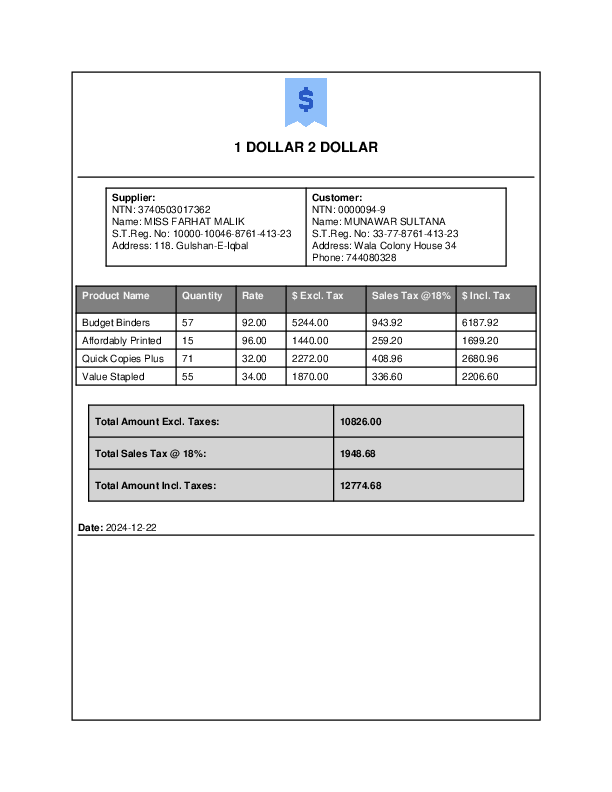

In [11]:
# Generated PDF
img = WImage(filename='/kaggle/working/pdfs/format1/receipt_2.pdf')
img

In [12]:
pdf_path = "pdfs/format1"
img_path = "images/format1"
# Convert all PDFs in the folder
convert_pdf_to_jpeg(pdf_path,img_path)
create_zip_from_folder(pdf_path,"pdfFormat1.zip")
create_zip_from_folder(img_path,"imgFormat1.zip")
print("Done")

Converted files in images/format1 to JPEG images.
ZIP file 'pdfFormat1.zip' created successfully.
ZIP file 'imgFormat1.zip' created successfully.
Done


# PDF Format 2

## Range 5k-10k

In [13]:
# Folder to save PDFs
output_folder = "pdfs/format2"
os.makedirs(output_folder, exist_ok=True)

# Range
data=df.iloc[5000:10000]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 5000 to 9999
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NTN                               5000 non-null   object 
 1   NAME                              4996 non-null   object 
 2   S.T.Reg. No                       5000 non-null   object 
 3   Address                           5000 non-null   object 
 4   Customer_Receipt_NO               5000 non-null   int64  
 5   Customer_NTN                      5000 non-null   object 
 6   Customer_NAME                     5000 non-null   object 
 7   Customer_S.T.Reg. No              5000 non-null   object 
 8   Customer_Phone Number             5000 non-null   object 
 9   Customer_Address                  5000 non-null   object 
 10  Business Name                     5000 non-null   object 
 11  Product 1                         4992 non-null   object 
 12  Pro

In [14]:
def generate_receipt(output_file, data_row):
    """
    Generates a PDF receipt with details dynamically populated from the data_row.
    """
    # Create file path
    output_path = os.path.join(output_folder, output_file)
    
    # Document configuration
    doc = SimpleDocTemplate(output_path, pagesize=letter, rightMargin=20, leftMargin=20, topMargin=20, bottomMargin=20)
    elements = []

    # Styles
    styles = getSampleStyleSheet()
    title_style = ParagraphStyle('Title', fontSize=14, alignment=1, spaceAfter=6, bold=True)
    normal_style = styles['Normal']
    normal_style.wordWrap = 'CJK'

    # Add header with dynamic seller name and gap
    header_table = Table([
        [
            Image("logo.png", width=50, height=50),
            Paragraph(f"<b>{data_row['NAME']} Traders </b><br/><br/>"  # Added gap with <br/><br/>
                      "General Order Suppliers<br/>"
                      "Importers - Exporters", title_style)
        ]
    ], colWidths=[60, 450])
    elements.append(header_table)
    elements.append(Spacer(1, 12))

    elements.append(Paragraph(f"Serial Number: <b>{data_row['Customer_Receipt_NO']}</b>", normal_style))
    elements.append(Spacer(1, 12))

    # Add supplier and buyer details
    details_table = Table([
        [
            Paragraph(f"<b>Supplier's Name:</b> {data_row['NAME']}", normal_style),
            Paragraph(f"<b>Buyer's Name:</b> {data_row['Customer_NAME']}", normal_style)
        ],
        [
            Paragraph(f"<b>Address:</b> {data_row['Address']}", normal_style),
            Paragraph(f"<b>Address:</b> {data_row['Customer_Address']}", normal_style)
        ],
        [
            Paragraph(f"<b>S.T. Reg. No.:</b> {data_row['S.T.Reg. No']}", normal_style),
            Paragraph(f"<b>S.T. Reg. No.:</b> {data_row['Customer_S.T.Reg. No']}", normal_style)
        ],
        [
            Paragraph(f"<b>NTN:</b> {data_row['NTN']}", normal_style),
            Paragraph(f"<b>NTN:</b> {data_row['Customer_NTN']}", normal_style)
        ]
    ], colWidths=[270, 270])
    elements.append(details_table)
    elements.append(Spacer(1, 12))

    # Prepare product details
    products = [
        {
            "description": data_row.get(f"Product {i}", ""),
            "quantity": data_row.get(f"Quantity_Product_{i}", 0),
            "rate": data_row.get(f"Rate_Product_{i}", 0),
            "excl_tax": data_row.get(f"Amount Excluding Taxes_Product_{i}", 0),
            "sales_tax": data_row.get(f"Sales Tax @ 18%_Product_{i}", 0),
            "incl_tax": data_row.get(f"Amount Including Taxes_Product_{i}", 0)
        }
        for i in range(1, 5)
    ]

    # Add product table headers
    data = [
        [
            Paragraph("SR. NO", normal_style),
            Paragraph("Description", normal_style),
            Paragraph("Quantity", normal_style),
            Paragraph("Rate", normal_style),  # Adjusted width below
            Paragraph("Amount Excluding Tax", normal_style),
            Paragraph("Sales Tax (18%)", normal_style),
            Paragraph("Amount Including Tax", normal_style)  # Adjusted width below
        ]
    ]

    # Populate product rows
    for i, product in enumerate(products):
        data.append([
            Paragraph(str(i + 1), normal_style),
            Paragraph(str(product["description"] or ""), normal_style),  # Handle missing descriptions
            Paragraph(f"{product['quantity']}", normal_style),
            Paragraph(f"{product['rate']}", normal_style),
            Paragraph(f"{round(product['excl_tax'], 2)}", normal_style),
            Paragraph(f"{round(product['sales_tax'], 2)}", normal_style),
            Paragraph(f"{round(product['incl_tax'], 2)}", normal_style)
        ])

    # Ensure at least 6 blank rows after the products
    for _ in range(6):
        data.append(["", "", "", "", "", "", ""])

    # Add totals row
    total_excl_tax = round(data_row.get("Total Amount Excluding Taxes", 0), 2)
    total_sales_tax = round(data_row.get("Total Sales Tax @ 18%", 0), 2)
    total_incl_tax = round(data_row.get("Total Amount Including Taxes", 0), 2)

    data.append([
        Paragraph("<b>Total</b>", normal_style), "", "", "",
        Paragraph(f"<b>{total_excl_tax}</b>", normal_style),
        Paragraph(f"<b>{total_sales_tax}</b>", normal_style),
        Paragraph(f"<b>{total_incl_tax}</b>", normal_style)
    ])

    # Create table with adjusted column widths
    table = Table(data, colWidths=[50, 150, 60, 50, 100, 60, 100])  # Adjusted widths for "Rate" and "Amount Including Tax"
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('GRID', (0, 0), (-1, -1), 0.25, colors.black),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
    ]))
    elements.append(table)
    elements.append(Spacer(1, 12))

    elements.append(Paragraph(f"Date: <u><i>__{data_row['Date']}__</i></u> <br />", normal_style))
    elements.append(Spacer(1, 5)) 
    
    elements.append(Paragraph(f"Signature: <u><i>__{data_row['NAME']}__</i></u> <br />", normal_style))
    elements.append(Spacer(1, 5))
    
    elements.append(Paragraph(f"Name & Designation: <u><i>__{data_row['NAME']}, Manager__</i></u>", normal_style))
    elements.append(Spacer(1, 5))


    # Build PDF
    doc.build(elements)
    return output_path


In [15]:
# Loop
for index, row in data.iterrows():
    generate_receipt(f"receipt_{index + 1}.pdf", row)

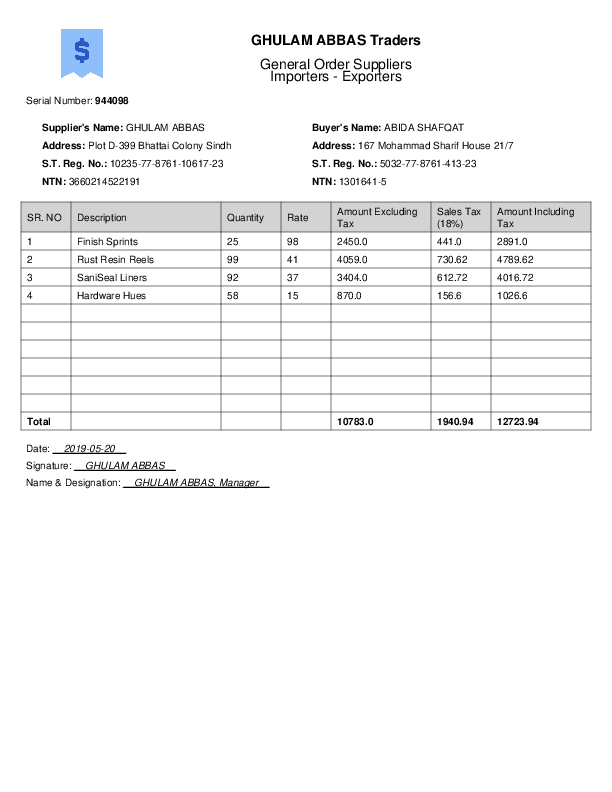

In [16]:
# Generated PDF
img = WImage(filename='/kaggle/working/pdfs/format2/receipt_5001.pdf')
img

In [17]:
pdf_path = "pdfs/format2"
img_path = "images/format2"
# Convert all PDFs in the folder
convert_pdf_to_jpeg(pdf_path,img_path)
create_zip_from_folder(pdf_path,"pdfFormat2.zip")
create_zip_from_folder(img_path,"imgFormat2.zip")
print("Done")

Converted files in images/format2 to JPEG images.
ZIP file 'pdfFormat2.zip' created successfully.
ZIP file 'imgFormat2.zip' created successfully.
Done


# PDF Format 3

In [ ]:
!git clone https://github.com/thenumanahmed/animations

In [ ]:
start_row = 10000
end_row = 15000
data = df


output_directory = "pdfs/format3"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [ ]:
# Styles
styles = getSampleStyleSheet()
title_style = styles["Title"]
normal_style = styles["Normal"]
table_header_style = styles["BodyText"]
table_header_style.fontSize = 10
table_cell_style = styles["BodyText"]
table_cell_style.fontSize = 9

# Function to create PDF for each invoice
def create_invoice(data, index):
    # Create the file path for the invoice
    invoice_pdf = f"{output_directory}/invoice_{index}.pdf"
    doc = SimpleDocTemplate(invoice_pdf, pagesize=letter, rightMargin=20, leftMargin=20, topMargin=30, bottomMargin=30)

    # Extract values from DataFrame for this index
    supplier_info = [
        ["Supplier's Name:", data['Business Name'][index]],
        ["Address:", data['Address'][index]],
        ["S.T. Reg. No.:", data['S.T.Reg. No'][index]],
        ["NTN:", data['NTN'][index]]
    ]

    buyer_info = [
        ["Buyer's Name:", data['Customer_NAME'][index]],
        ["Address:", data['Customer_Address'][index]],
        ["S.T. Reg. No.:", data['Customer_S.T.Reg. No'][index]],
        ["NTN:", data['Customer_NTN'][index]]
    ]

    # Prepare product data
    products = []
    for i in range(1, 5):
        if pd.notna(data[f'Product {i}'][index]):
            # Wrap each field in a Paragraph to handle long text
            products.append([
                str(i),
                Paragraph(data[f'Product {i}'][index], table_cell_style),
                str(data[f'Quantity_Product_{i}'][index]),
                f"{data[f'Rate_Product_{i}'][index]:,.2f}",
                f"{data[f'Amount Excluding Taxes_Product_{i}'][index]:,.2f}",
                f"{data[f'Sales Tax @ 18%_Product_{i}'][index]:,.2f}",
                f"{data[f'Amount Including Taxes_Product_{i}'][index]:,.2f}"
            ])
            
    # Add blank rows if needed
    while len(products) < 12:
        products.append(["", "", "", "", "", "", ""])

    # Total amounts
    products.append(["", "", "", Paragraph("<b>Total:</b>"),
                     f"{data['Total Amount Excluding Taxes'][index]:,.2f}",
                     f"{data['Total Sales Tax @ 18%'][index]:,.2f}",
                     f"{data['Total Amount Including Taxes'][index]:,.2f}"])

    # Generate PDF content
    content = []
    # Add images with specified widths
    image_paths = ["/kaggle/working/animations/logo.png", "/kaggle/working/animations/name.png", "/kaggle/working/animations/details.png"]
    images = [
        Image(image_paths[0], width=50, height=60),
        Image(image_paths[1], width=300, height=60),
        Image(image_paths[2], width=90, height=60)
    ]

    # Create table for images
    image_table = Table(
        [[images[0], Spacer(50, 0), images[1], Spacer(50, 0), images[2]]],
        colWidths=[30, 50, 280, 50, 70]
    )

    content.append(image_table)
    content.append(Spacer(1, 12))

    # Title
    content.append(Paragraph("SALES TAX INVOICE", title_style))
    content.append(Spacer(1, 12))

    # Serial and Date (Using the date from the 'Date' column)
    date_value = data['Date'][index]
    
    # Convert to datetime object if the date is in string format
    if isinstance(date_value, str):
        date_value = datetime.strptime(date_value, "%Y-%m-%d")  # Adjust format if needed

    # Format the date
    current_date = date_value.strftime("%d-%m-%Y")
    serial_number = data['Customer_Receipt_NO'][index]  # Use Customer_Receipt_NO for the serial number

    serial_date_table = Table([[Paragraph(f"<b>Serial No.:</b> {serial_number}"), Paragraph(f"<b>Date:</b> {current_date}")]], colWidths=[300, 100])
    serial_date_table.setStyle(TableStyle([("ALIGN", (1, 0), (1, 0), "RIGHT")]))
    content.append(serial_date_table)
    content.append(Spacer(1, 12))

    # Supplier and Buyer Details
    def create_info_table(info):
        return [Paragraph(f"<b>{row[0]}</b> {row[1]}", table_cell_style) for row in info]

    supplier_buyer_table = Table([  # Add headers for Supplier and Buyer details
        [Paragraph("<b>Supplier's Details:</b>", table_header_style), Paragraph("<b>Buyer's Details:</b>", table_header_style)],
        [create_info_table(supplier_info), create_info_table(buyer_info)]
    ], colWidths=[285, 285])
    supplier_buyer_table.setStyle(TableStyle([("GRID", (0, 0), (-1, -1), 1, colors.black)]))
    content.append(supplier_buyer_table)
    content.append(Spacer(1, 12))

    # Product Table
    table_data = [[Paragraph("SR. NO."), Paragraph("Description"), Paragraph("Quantity"), Paragraph("Rate"),
                   Paragraph("Amount Excluding ST"), Paragraph("Sales Tax"), Paragraph("Amount Including ST")]] + products
    product_table = Table(table_data, colWidths=[50, 180, 50, 60, 80, 80, 80])
    product_table.setStyle(TableStyle([
        ("GRID", (0, 0), (-1, -1), 1, colors.black),
        ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
        ("ALIGN", (0, 0), (-1, -1), "LEFT")
    ]))
    content.append(product_table)
    content.append(Spacer(1, 12))

    # Footer
    footer_data = [
        [Paragraph(f"<b>Sales Tax:</b> {data['Total Sales Tax @ 18%'][index]:,.2f}", normal_style),
         Paragraph("<b>Signature:</b> ___________________", normal_style)],
        [Paragraph(f"<b>Net Tax Inclusive Value:</b> {data['Total Amount Including Taxes'][index]:,.2f}", normal_style),
         Paragraph("<b>Name and Designation:</b> ___________________", normal_style)]
    ]
    footer_table = Table(footer_data, colWidths=[285, 285])
    footer_table.setStyle([
        ("ALIGN", (0, 0), (-1, -1), "LEFT"),
        ("VALIGN", (0, 0), (-1, -1), "MIDDLE"),
        ("FONTNAME", (0, 0), (-1, -1), "Helvetica")
    ])
    content.append(footer_table)
    content.append(Spacer(1, 12))

    # Build PDF
    doc.build(content)
    # print(f"Invoice {index} PDF generated successfully!")

In [ ]:
# Loop through the rows and generate the PDFs
for index in range(start_row, end_row):
    create_invoice(data, index)

In [ ]:
pdf_path = "pdfs/format3"
img_path = "images/format3"
# Convert all PDFs in the folder
convert_pdf_to_jpeg(pdf_path,img_path)
create_zip_from_folder(pdf_path,"pdfFormat3.zip")
create_zip_from_folder(img_path,"imgFormat3.zip")
print("Done")

# PDF Format 4

In [ ]:
start_row = 15001  
end_row = 20000
data = df

# Create the directory to save PDFs if it doesn't exist
output_directory = "pdfs/format4"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [ ]:
# Styles
styles = getSampleStyleSheet()
title_style = styles["Title"]
normal_style = styles["Normal"]
table_header_style = styles["BodyText"]
table_header_style.fontSize = 10
table_cell_style = styles["BodyText"]
table_cell_style.fontSize = 9

# Function to create PDF for each invoice
def create_invoice(data, index):
    # Create the file path for the invoice
    invoice_pdf = f"{output_directory}/invoice_{index}.pdf"
    doc = SimpleDocTemplate(invoice_pdf, pagesize=letter, rightMargin=20, leftMargin=20, topMargin=30, bottomMargin=30)

    # Extract values from DataFrame for this index
    supplier_info = [
        ["Supplier's Name:", data['Business Name'][index]],
        ["Address:", data['Address'][index]],
        ["S.T. Reg. No.:", data['S.T.Reg. No'][index]],
        ["NTN:", data['NTN'][index]]
    ]

    buyer_info = [
        ["Buyer's Name:", data['Customer_NAME'][index]],
        ["Address:", data['Customer_Address'][index]],
        ["S.T. Reg. No.:", data['Customer_S.T.Reg. No'][index]],
        ["NTN:", data['Customer_NTN'][index]]
    ]

    # Prepare product data
    products = []
    for i in range(1, 5):
        if pd.notna(data[f'Product {i}'][index]):
            # Wrap each field in a Paragraph to handle long text
            products.append([
                str(i),
                Paragraph(data[f'Product {i}'][index], table_cell_style),
                str(data[f'Quantity_Product_{i}'][index]),
                f"{data[f'Rate_Product_{i}'][index]:,.2f}",
                f"{data[f'Amount Excluding Taxes_Product_{i}'][index]:,.2f}",
                f"{data[f'Sales Tax @ 18%_Product_{i}'][index]:,.2f}",
                f"{data[f'Amount Including Taxes_Product_{i}'][index]:,.2f}"
            ])
            
    # Add blank rows if needed
    while len(products) < 12:
        products.append(["", "", "", "", "", "", ""])

    # Total amounts
    products.append(["", "", "", Paragraph("<b>Total:</b>"),
                     f"{data['Total Amount Excluding Taxes'][index]:,.2f}",
                     f"{data['Total Sales Tax @ 18%'][index]:,.2f}",
                     f"{data['Total Amount Including Taxes'][index]:,.2f}"])

    # Generate PDF content
    content = []
    # Add images with specified widths
    image_paths = ["/kaggle/working/animations/logo.png", "/kaggle/working/animations/name.png", "/kaggle/working/animations/details.png"]
    images = [
        Image(image_paths[0], width=50, height=60),
        Image(image_paths[1], width=300, height=60),
        Image(image_paths[2], width=90, height=60)
    ]

    # Create table for images
    image_table = Table(
        [[images[0], Spacer(50, 0), images[1], Spacer(50, 0), images[2]]],
        colWidths=[30, 50, 280, 50, 70]
    )

    content.append(image_table)
    content.append(Spacer(1, 12))

    # Title
    content.append(Paragraph("SALES TAX INVOICE", title_style))
    content.append(Spacer(1, 12))

    # Serial and Date (Using the date from the 'Date' column)
    date_value = data['Date'][index]
    
    # Convert to datetime object if the date is in string format
    if isinstance(date_value, str):
        date_value = datetime.strptime(date_value, "%Y-%m-%d")  # Adjust format if needed

    # Format the date
    current_date = date_value.strftime("%d-%m-%Y")
    serial_number = data['Customer_Receipt_NO'][index]  # Use Customer_Receipt_NO for the serial number

    serial_date_table = Table([[Paragraph(f"<b>Serial No.:</b> {serial_number}"), Paragraph(f"<b>Date:</b> {current_date}")]], colWidths=[300, 100])
    serial_date_table.setStyle(TableStyle([("ALIGN", (1, 0), (1, 0), "RIGHT")]))
    content.append(serial_date_table)
    content.append(Spacer(1, 12))

    # Supplier and Buyer Details
    content.append(Paragraph("<b>Supplier's Details:</b>", table_header_style))

    # Add Supplier's Details
    for row in supplier_info:
        content.append(Paragraph(f"<b>{row[0]}</b> {row[1]}", table_cell_style))

    # Add Spacer
    content.append(Spacer(1, 12))

    # Add Buyer's Details below the Supplier Details
    content.append(Paragraph("<b>Buyer's Details:</b>", table_header_style))

    # Add Buyer's Details
    for row in buyer_info:
        content.append(Paragraph(f"<b>{row[0]}</b> {row[1]}", table_cell_style))

    # Add Spacer
    content.append(Spacer(1, 12))


    # Product Table
    table_data = [[Paragraph("SR. NO."), Paragraph("Description"), Paragraph("Quantity"), Paragraph("Rate"),
                   Paragraph("Amount Excluding ST"), Paragraph("Sales Tax"), Paragraph("Amount Including ST")]] + products
    product_table = Table(table_data, colWidths=[50, 180, 50, 60, 80, 80, 80])
    product_table.setStyle(TableStyle([
        ("GRID", (0, 0), (-1, -1), 1, colors.black),
        ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
        ("ALIGN", (0, 0), (-1, -1), "LEFT")
    ]))
    content.append(product_table)
    content.append(Spacer(1, 12))

    # Footer
    footer_data = [
        [Paragraph(f"<b>Sales Tax:</b> {data['Total Sales Tax @ 18%'][index]:,.2f}", normal_style),
         Paragraph("<b>Signature:</b> ___________________", normal_style)],
        [Paragraph(f"<b>Net Tax Inclusive Value:</b> {data['Total Amount Including Taxes'][index]:,.2f}", normal_style),
         Paragraph("<b>Name and Designation:</b> ___________________", normal_style)]
    ]
    footer_table = Table(footer_data, colWidths=[285, 285])
    footer_table.setStyle([
        ("ALIGN", (0, 0), (-1, -1), "LEFT"),
        ("VALIGN", (0, 0), (-1, -1), "MIDDLE"),
        ("FONTNAME", (0, 0), (-1, -1), "Helvetica")
    ])
    content.append(footer_table)
    content.append(Spacer(1, 12))

    # Build PDF
    doc.build(content)
    # print(f"Invoice {index} PDF generated successfully!")

In [ ]:
# Loop through the rows and generate the PDFs
for index in range(start_row, end_row):
    create_invoice(data, index)

In [ ]:
pdf_path = "pdfs/format4"
img_path = "images/format4"
# Convert all PDFs in the folder
convert_pdf_to_jpeg(pdf_path,img_path)
create_zip_from_folder(pdf_path,"pdfFormat4.zip")
create_zip_from_folder(img_path,"imgFormat4.zip")
print("Done")